In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

df = pd.read_csv("C:/Users/ashwi/Downloads/DNF_data.csv", header=None)




In [ ]:

df.columns = ["Timestamp", "Score", "Remark"]
df.head()


,Timestamp,Score,Remark
0,0-00-00 09:00:18,4,Correct! The colors are properly sorted!
1,0-00-00 09:02:36,3,Correct! The colors are properly sorted!
2,0-00-00 09:02:51,3,Correct! The colors are properly sorted!
3,0-00-00 09:03:11,6,Correct! The colors are properly sorted!
4,0-00-00 09:04:05,5,Correct! The colors are properly sorted!


In [ ]:

label_encoder = LabelEncoder()
df["Encoded_Remark"] = label_encoder.fit_transform(df["Remark"])



In [ ]:

X = df[["Score"]]  
y = df["Encoded_Remark"]  



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Model Accuracy: 0.3611

Classification Report:
                                          precision    recall  f1-score   support

Correct! The colors are properly sorted!       0.38      0.44      0.41        18
           Not quite right. Keep trying!       0.33      0.28      0.30        18

                                accuracy                           0.36        36
                               macro avg       0.36      0.36      0.36        36
                            weighted avg       0.36      0.36      0.36        36



In [ ]:
future_scores = np.random.randint(0, 21, size=10)  
future_df = pd.DataFrame({"Score": future_scores})
future_predictions = model.predict(future_df)  
future_df["Predicted_Remark"] = label_encoder.inverse_transform(future_predictions)
future_df["Index"] = range(len(df), len(df) + 10)



In [ ]:

print("\nPredicted Next 10 Entries:")
print(future_df.to_string(index=False))




Predicted Next 10 Entries:
 Score                         Predicted_Remark  Index
     9            Not quite right. Keep trying!    180
    17 Correct! The colors are properly sorted!    181
    16 Correct! The colors are properly sorted!    182
     5 Correct! The colors are properly sorted!    183
    18 Correct! The colors are properly sorted!    184
    13 Correct! The colors are properly sorted!    185
    10 Correct! The colors are properly sorted!    186
     1            Not quite right. Keep trying!    187
    15            Not quite right. Keep trying!    188
     1            Not quite right. Keep trying!    189


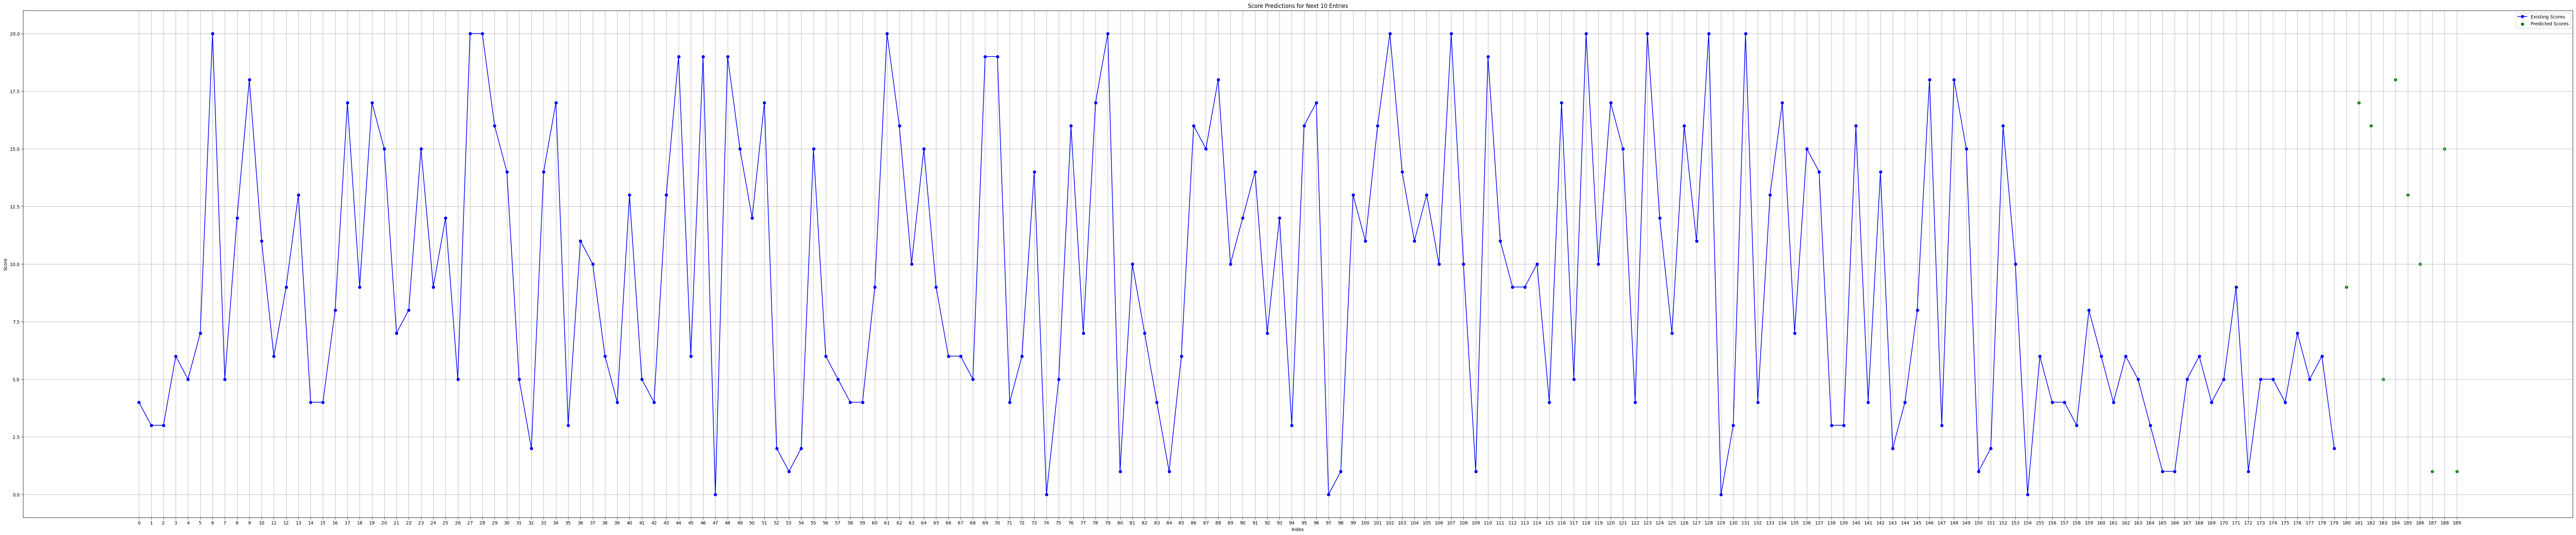

In [ ]:

plt.figure(figsize=(100, 20))
plt.plot(df.index, df["Score"], marker='o', linestyle='-', color='b', label="Existing Scores")
plt.scatter(future_df["Index"], future_df["Score"], color='g', marker='o', label="Predicted Scores")
plt.title("Score Predictions for Next 10 Entries")
plt.xlabel("Index")
plt.ylabel("Score")
plt.xticks(list(df.index) + list(future_df["Index"]))
plt.grid(True)
plt.legend()
plt.show()



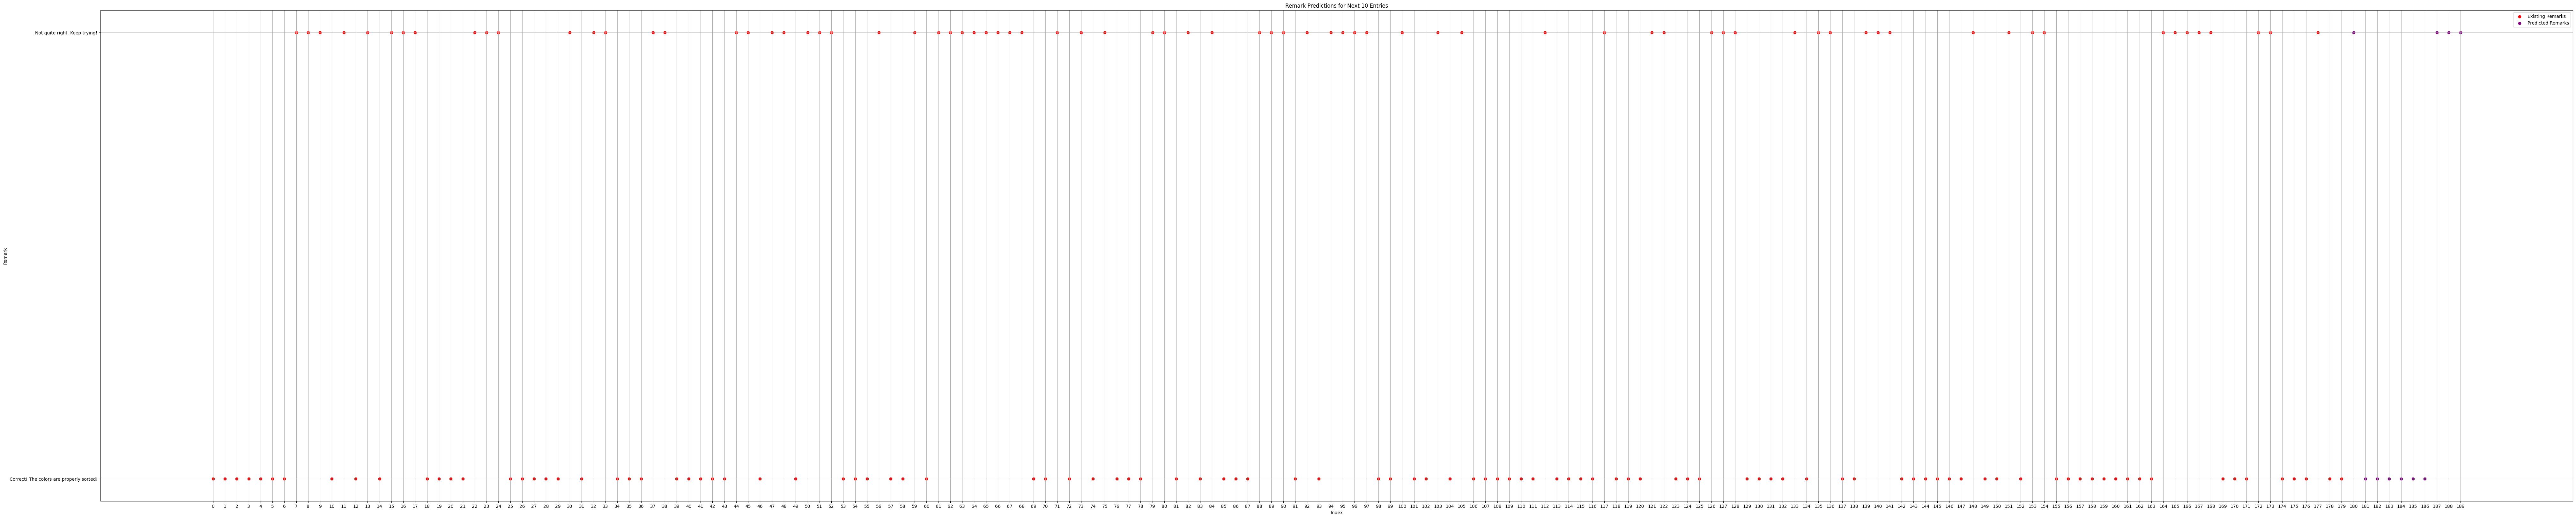

In [ ]:

plt.figure(figsize=(100, 20))
plt.scatter(df.index, df["Encoded_Remark"], color='r', marker='o', label="Existing Remarks")
plt.scatter(future_df["Index"], future_predictions, color='purple', marker='o', label="Predicted Remarks")
plt.title("Remark Predictions for Next 10 Entries")
plt.xlabel("Index")
plt.ylabel("Remark")
plt.yticks([0, 1], label_encoder.classes_)  
plt.xticks(list(df.index) + list(future_df["Index"]))
plt.grid(True)
plt.legend()
plt.show()